In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# I. About the dataset

We use the dataset **Energy balance matrix** from 1970 to 2021 of Brazil. The dataset is downloaded in the website of 
Olade.

The calculations for data processing base on the **Manual Olade 2011**

## I.1 Load the dataset

In [176]:
# Load the file
file_path = '../datas/Option_B/Brazil_Energy balance matrix.xlsx'
#File excel with multi-sheet_names is read as an Dictionary
Dict = pd.read_excel(file_path, sheet_name=None, skiprows=range(4), skipfooter=3)

for k in Dict.keys():       
    # Round the values of each column in dataframe with 2 decimals
    Dict[k]=Dict[k].applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
    
    #Ignor the first row (unit) in each df
    Dict[k]=Dict[k][1:]
    
    #Rename of columns in df
    Dict[k].rename(columns={'Unnamed: 0': 'SECTOR','OTHER PRIMARY_x000d_\n':'OTHER PRIMARY'}, inplace=True)   
    
#print(Dict.keys())

# Convert the keys of Dict to only contain the year
for k in list(Dict.keys()):
    k_new = k.split(' - ')[0]
    Dict[k_new] = Dict.pop(k)
    
    Dict[k_new]["Year"]=k_new
        
print('\n')
print(Dict.keys())



#Save the Clean Dictionary in Excel with multi-sheet_names
file_path='../datas/Option_B/Datas_cleaned/Brazil_Energy balance matrix_cleaned.xlsx'
with pd.ExcelWriter(file_path) as writer:
    for k, df in Dict.items():
        df.to_excel(writer, sheet_name=k)

df_2021=Dict['2021']
df_2021.head(10)



dict_keys(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])


,SECTOR,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,...,DIESEL OIL,FUEL OIL,COKE,CHARCOAL,GASES,OTHER SECONDARY,NON-ENERGY,TOTAL SECUNDARIES,TOTAL,Year
1,PRODUCTION,152713.43,26371.48,2633.08,31125.01,NaN,3835.75,26017.95,49469.74,28037.32,...,41972.43,16109.25,6866.86,3915.43,2060.14,9109.18,5630.96,189790.51,320203.76,2021
2,IMPORT,7359.21,14796.23,13216.31,NaN,NaN,NaN,NaN,NaN,NaN,...,12211.92,581.74,1150.16,NaN,NaN,2901.18,1712.36,31674.9,67046.66,2021
3,EXPORT,65724.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,499.3,11963.08,NaN,NaN,NaN,841.83,385.76,17331.46,83055.53,2021
4,STOCK CHANGE,-1007.78,-3598.93,67.82,NaN,NaN,NaN,NaN,NaN,NaN,...,-22.66,-431.71,-92.5,NaN,NaN,-25.31,-8.2,-35.62,-4574.51,2021
5,UNUSED,NaN,1217.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1217.87,2021
6,TOTAL SUPPLY,93340.78,36350.92,15917.21,31125.01,NaN,3835.75,26017.95,49469.74,28037.32,...,53662.39,4296.2,7924.52,3915.43,2060.14,11143.23,6949.36,204098.32,298402.5,2021
7,REFINERIES,-92551.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36249.21,16109.25,NaN,NaN,NaN,7528.3,4710.47,95389.98,2838.23,2021
8,POWER PLANTS,NaN,-13219.0,-4189.67,-29752.22,NaN,-3835.75,-56.11,NaN,-7138.42,...,-1371.21,-1656.49,NaN,NaN,NaN,-75.3,NaN,46508.5,-14785.66,2021
9,SELF-PRODUCERS,NaN,-4266.04,-215.78,-1372.79,NaN,NaN,-373.38,-5782.78,-5688.41,...,-561.98,-225.32,NaN,NaN,-394.47,-551.3,NaN,9776.97,-9655.28,2021
10,GAS PLANTS,NaN,-2583.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,920.49,2354.08,-229.54,2021


In [177]:
df_2021.columns  

#LPG stands for Liquefied Petroleum Gas

Index(['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY',
       'TOTAL PRIMARIES', 'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY', 'NON-ENERGY', 'TOTAL SECUNDARIES', 'TOTAL',
       'Year'],
      dtype='object')

## I.2 Frist visualization of energy balance (Supply-Transformation-Consumption)

In [178]:
Dict1=Dict.copy()

for k in Dict1.keys():
    selected_columns = ['SECTOR', 'TOTAL PRIMARIES', 'TOTAL SECUNDARIES', 'TOTAL','Year']
    Dict1[k]=Dict1[k][selected_columns]
    selected_rows=['TOTAL SUPPLY','TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict1[k]=Dict1[k][Dict1[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict1.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    
# Get the df "TOTAL SUPPLY"

df_TS=df_conc.loc[df_conc["SECTOR"]=="TOTAL SUPPLY"].drop(columns=["SECTOR"], axis=1)

#Save this df_TS to excel:
file_TS='../datas/Option_B/Datas_cleaned/TOTAL_SUPPLY_Brazil.xlsx'
df_TS.to_excel(file_TS)

# Get the df "TOTAL TRANSFORMATION"

df_TT=df_conc.loc[df_conc["SECTOR"]=="TOTAL TRANSFORMATION"].drop(columns=["SECTOR"], axis=1)

#Save this df_TS to excel:
file_TT='../datas/Option_B/Datas_cleaned/TOTAL_TRANSFORMATION_Brazil.xlsx'
df_TT.to_excel(file_TT)

# Get the df "FINAL CONSUMPTION"

df_TC=df_conc.loc[df_conc["SECTOR"]=="FINAL CONSUMPTION"].drop(columns=["SECTOR"], axis=1)

#Save this df_TS to excel:
file_TC='../datas/Option_B/Datas_cleaned/FINAL CONSUMPTION_Brazil.xlsx'
df_TC.to_excel(file_TC)


df_TS.head()

,TOTAL PRIMARIES,TOTAL SECUNDARIES,TOTAL
Year,,,
1970,67176.64,30633.82,66742.4
1971,69391.7,34509.96,70092.03
1972,76197.42,38477.46,75111.33
1973,83252.49,45191.03,81963.44
1974,87620.68,50406.2,87628.2


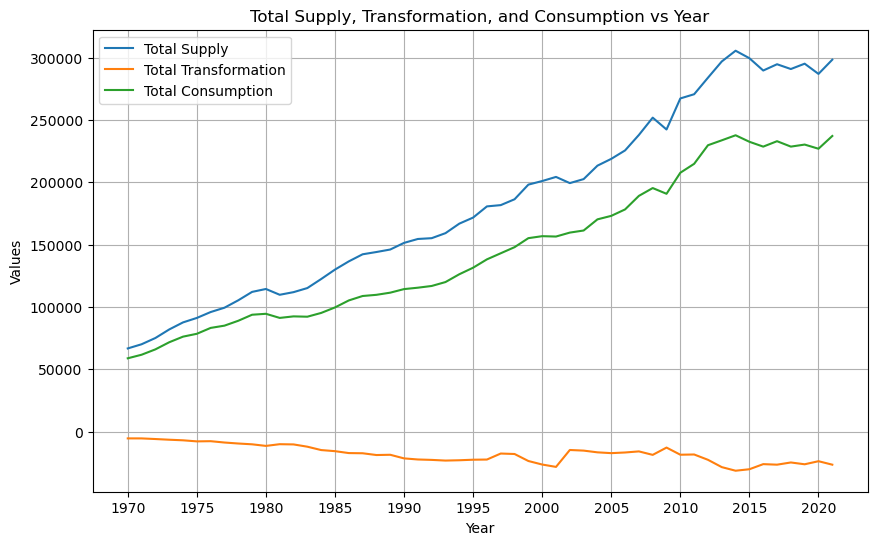

In [179]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=( 10,6))

# Plot Total Supply
sns.lineplot(data=df_TS, x=df_TS.index, y='TOTAL', label='Total Supply', ax=ax)

# Plot Total Transformation
sns.lineplot(data=df_TT, x=df_TT.index, y='TOTAL', label='Total Transformation', ax=ax)

# Plot Total Consumption
sns.lineplot(data=df_TC, x=df_TC.index, y='TOTAL', label='Total Consumption', ax=ax)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Total Supply, Transformation, and Consumption vs Year')
ax.set_xticks(df_TS.index[::5])

# Show the legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()

## I.3 SUPPLY

### I.3.1. Preview the Total Supply of Primary Sources

The primary sources include: **'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY'**

In [180]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TOTAL SUPPLY']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_TS1=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TS1 = df_TS1.apply(lambda column: column.fillna(0))
    
df_TS1.head()


,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,TOTAL PRIMARIES
Year,,,,,,,,,,
1970,25664.25,180.02,2235.39,3421.52,0,0.0,31851.53,3600.70,223.24,67176.64
1971,27222.25,279.11,2294.86,3713.63,0,0.0,31807.22,3841.81,232.82,69391.70
1972,32473.41,313.00,2311.25,4356.82,0,0.0,32143.13,4298.39,301.43,76197.42
1973,38778.41,358.06,2287.08,4976.55,0,0.0,31897.40,4644.41,310.58,83252.49
1974,41479.10,544.45,2384.82,5646.13,0,0.0,32598.64,4618.65,348.89,87620.68


In [181]:
# Check if any columns have negative values
def negative_values(df):
    columns_with_negative_values = df.columns[df.lt(0).any()]
    # Count the number of negative values in each column
    negative_values_count = df.lt(0).sum()

    # Print the columns with negative values (if any)
    if not columns_with_negative_values.empty:
        print("Columns with negative values:")
        print(columns_with_negative_values)
        # Print the count of negative values in each column
        print("Number of negative values in each column:")
        print(negative_values_count)
    else:
        print("No columns have negative values.")
        
negative_values(df_TS1)

Columns with negative values:
Index(['NUCLEAR'], dtype='object')
Number of negative values in each column:
OIL                       0
NATURAL GAS               0
COAL                      0
HYDROENERGY               0
GEOTHERMAL                0
NUCLEAR                   1
FIREWOOD                  0
SUGARCANE AND PRODUCTS    0
OTHER PRIMARY             0
TOTAL PRIMARIES           0
dtype: int64


<Figure size 1000x600 with 0 Axes>

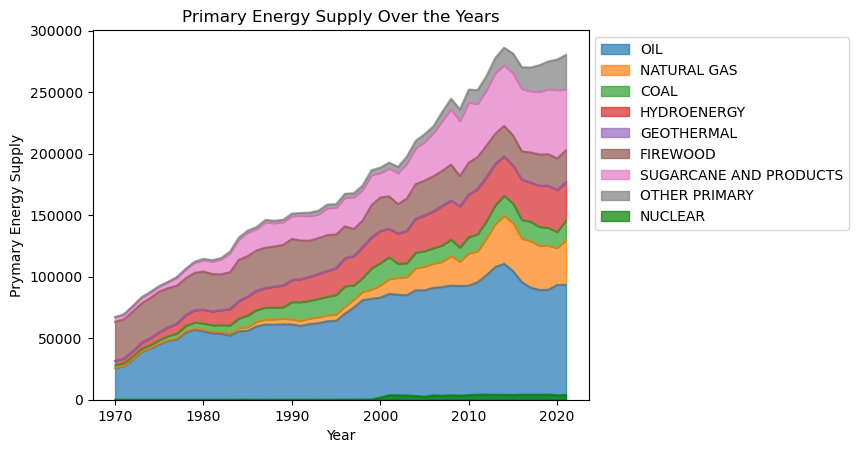

In [182]:
# Drop the 'TOTAL PRIMARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS1.drop(columns="TOTAL PRIMARIES")

# Separate the positive and negative parts of the 'NUCLEAR' column
positive_nuclear = df_stackplot['NUCLEAR'].clip(lower=0)
negative_nuclear = df_stackplot['NUCLEAR'].clip(upper=0).abs()

# Plot the stack plot for positive and negative parts separately
plt.figure(figsize=(10, 6))  # Set the figure size if needed
ax = df_stackplot.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7)
positive_nuclear.plot(kind='area', ax=ax, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear.plot(kind='area', ax=ax, color='red', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Prymary Energy Supply')
plt.title('Primary Energy Supply Over the Years')

# Move the legend directly to the figure
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()

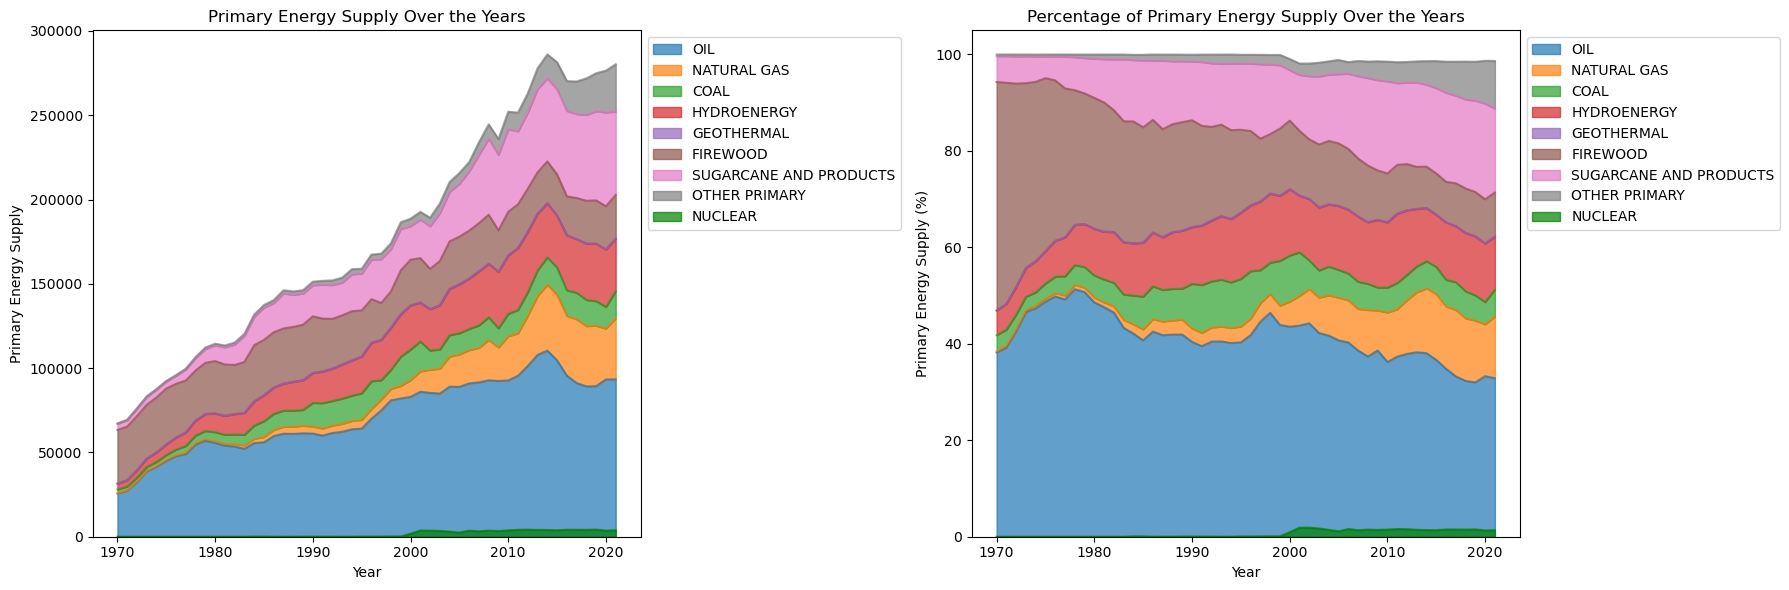

In [183]:
# Drop the 'TOTAL PRIMARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS1.drop(columns="TOTAL PRIMARIES")

# Calculate the percentage of each product relative to 'TOTAL PRIMARIES'
percentage_columns = ['OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL', 'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY']
df_TS1_percentages = (df_stackplot[percentage_columns].div(df_TS1['TOTAL PRIMARIES'], axis=0) * 100).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# First stack plot for Primary Energy Supply
positive_nuclear = df_stackplot['NUCLEAR'].clip(lower=0)
#negative_nuclear = df_stackplot['NUCLEAR'].clip(upper=0).abs()
df_stackplot.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7, ax=ax1)#drop(columns='NUCLEAR').
positive_nuclear.plot(kind='area', ax=ax1, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear.plot(kind='area', ax=ax1, color='red', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Primary Energy Supply')
ax1.set_title('Primary Energy Supply Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Second stack plot for Percentage of Primary Energy Supply
positive_nuclear_percent = df_TS1_percentages['NUCLEAR'].clip(lower=0)
#negative_nuclear_percent = df_TS1_percentages['NUCLEAR'].clip(upper=0).abs()
df_TS1_percentages.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7, ax=ax2)
positive_nuclear_percent.plot(kind='area', ax=ax2, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear_percent.plot(kind='area', ax=ax2, color='red', alpha=0.7)
ax2.set_xlabel('Year')
ax2.set_ylabel('Primary Energy Supply (%)')
ax2.set_title('Percentage of Primary Energy Supply Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

In [184]:
df_2021.SECTOR

1                                     PRODUCTION
2                                         IMPORT
3                                         EXPORT
4                                   STOCK CHANGE
5                                         UNUSED
6                                   TOTAL SUPPLY
7                                     REFINERIES
8                                  POWER PLANTS 
9                                 SELF-PRODUCERS
10                                    GAS PLANTS
11                               CHARCOAL PLANTS
12       COKE PLANTS AND BLAST FURNACES_x000d_\n
13                                  DISTILLERIES
14                                 OTHER CENTERS
15                          TOTAL TRANSFORMATION
16                               OWN CONSUMPTION
17                                        LOSSES
18                                    ADJUSTMENT
19                                    TRANSPORT 
20                                    INDUSTRIAL
21                  

In [185]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['IMPORT', 'EXPORT']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_IMP_EXP=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_IMP_EXP = df_IMP_EXP.apply(lambda column: column.fillna(0))
    
df_IMP_EXP.head(5)


,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,TOTAL PRIMARIES
Year,,,,,,,,,,


### I.3.2 Preview of the Total Supply of secondary energy sources

The secondary energy ensources include: **'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY','NON-ENERGY'**

In [186]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR',  'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY','NON-ENERGY', 'TOTAL SECUNDARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TOTAL SUPPLY']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_TS2=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TS2 = df_TS2.apply(lambda column: column.fillna(0))
    
df_TS2.head()

# Calculate the percentage of each product relative to 'TOTAL PRIMARIES'
percentage_columns_2 = ['ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL', 'KEROSENE/JET FUEL',
       'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL', 'GASES',
       'OTHER SECONDARY', 'NON-ENERGY']
df_TS2_percentages = (df_TS2[percentage_columns_2].div(df_TS2['TOTAL SECUNDARIES'], axis=0) * 100).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)


In [187]:
negative_values(df_TS2)

No columns have negative values.


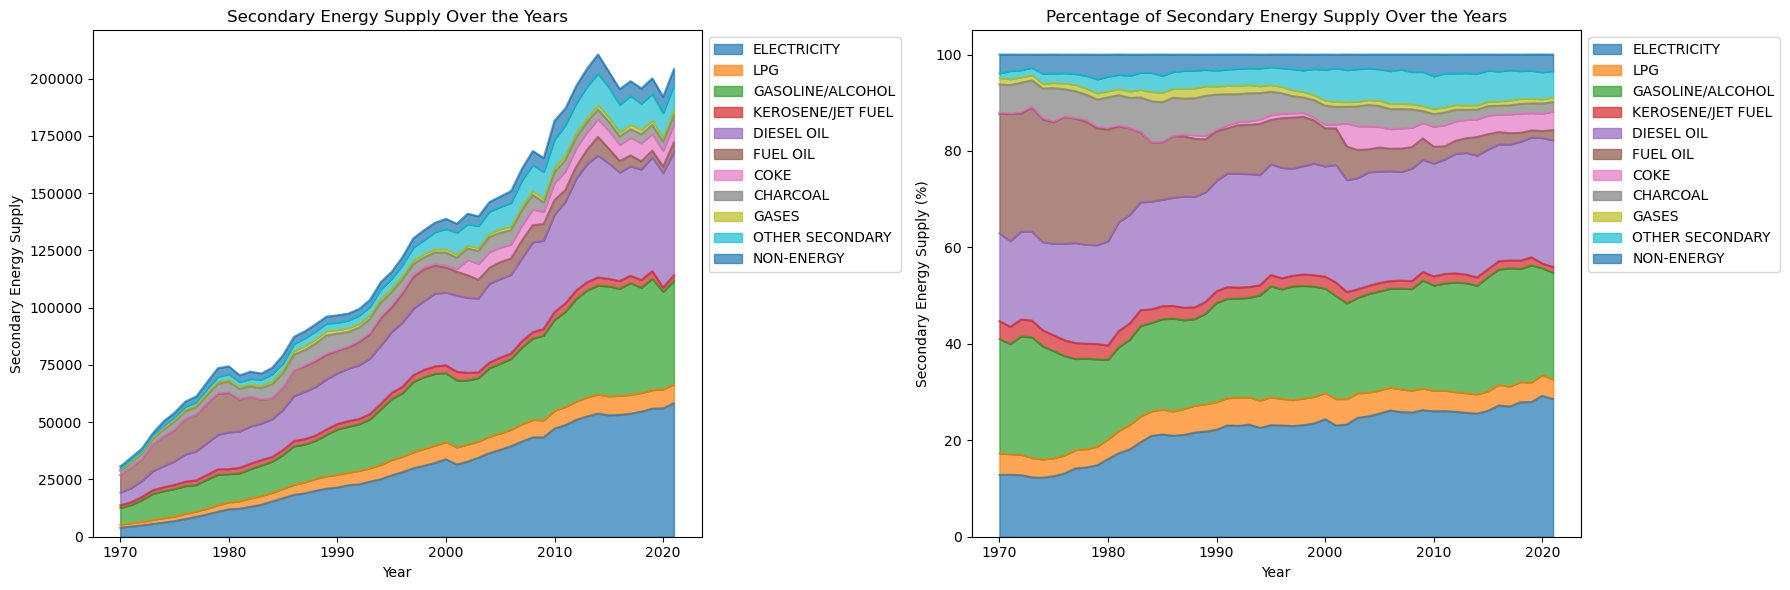

In [189]:
# Drop the 'TOTAL SECUNDARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS2.drop(columns="TOTAL SECUNDARIES")
# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Secondary Energy Supply')
ax1.set_title('Secondary Energy Supply Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_TS2_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel('Secondary Energy Supply (%)')
ax2.set_title('Percentage of Secondary Energy Supply Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

## I.4 CONSUMPTION



In [190]:
df_2021

,SECTOR,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,...,DIESEL OIL,FUEL OIL,COKE,CHARCOAL,GASES,OTHER SECONDARY,NON-ENERGY,TOTAL SECUNDARIES,TOTAL,Year
1,PRODUCTION,152713.43,26371.48,2633.08,31125.01,NaN,3835.75,26017.95,49469.74,28037.32,...,41972.43,16109.25,6866.86,3915.43,2060.14,9109.18,5630.96,189790.51,320203.76,2021
2,IMPORT,7359.21,14796.23,13216.31,NaN,NaN,NaN,NaN,NaN,NaN,...,12211.92,581.74,1150.16,NaN,NaN,2901.18,1712.36,31674.9,67046.66,2021
3,EXPORT,65724.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,499.3,11963.08,NaN,NaN,NaN,841.83,385.76,17331.46,83055.53,2021
4,STOCK CHANGE,-1007.78,-3598.93,67.82,NaN,NaN,NaN,NaN,NaN,NaN,...,-22.66,-431.71,-92.5,NaN,NaN,-25.31,-8.2,-35.62,-4574.51,2021
5,UNUSED,NaN,1217.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1217.87,2021
6,TOTAL SUPPLY,93340.78,36350.92,15917.21,31125.01,NaN,3835.75,26017.95,49469.74,28037.32,...,53662.39,4296.2,7924.52,3915.43,2060.14,11143.23,6949.36,204098.32,298402.5,2021
7,REFINERIES,-92551.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36249.21,16109.25,NaN,NaN,NaN,7528.3,4710.47,95389.98,2838.23,2021
8,POWER PLANTS,NaN,-13219.0,-4189.67,-29752.22,NaN,-3835.75,-56.11,NaN,-7138.42,...,-1371.21,-1656.49,NaN,NaN,NaN,-75.3,NaN,46508.5,-14785.66,2021
9,SELF-PRODUCERS,NaN,-4266.04,-215.78,-1372.79,NaN,NaN,-373.38,-5782.78,-5688.41,...,-561.98,-225.32,NaN,NaN,-394.47,-551.3,NaN,9776.97,-9655.28,2021
10,GAS PLANTS,NaN,-2583.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,920.49,2354.08,-229.54,2021


In [191]:
df_2021.columns

Index(['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY',
       'TOTAL PRIMARIES', 'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY', 'NON-ENERGY', 'TOTAL SECUNDARIES', 'TOTAL',
       'Year'],
      dtype='object')

In [192]:
Dict2=Dict.copy()

for k in Dict2.keys():
   # selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
    #   'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    selected_columns = ['SECTOR','TOTAL PRIMARIES', 'TOTAL SECUNDARIES','TOTAL','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['ENERGY CONSUMPTION','NON-ENERGY CONSUMPTION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_TC1=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TC1 = df_TC1.apply(lambda column: column.fillna(0))
    
# Calculate the percentage of each product relative to 'TOTAL PRIMARIES'
#percentage_columns_2 = ['ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL', 'KEROSENE/JET FUEL',
 #      'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL', 'GASES',
  #     'OTHER SECONDARY', 'NON-ENERGY']
percentage_columns_2= ['TOTAL PRIMARIES', 'TOTAL SECUNDARIES']

df_TC1_percentages = (df_TC1[percentage_columns_2].div(df_TC1['TOTAL'], axis=0) * 100).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)


In [193]:

df_TC1['sum_col']=df_TC1['TOTAL PRIMARIES']+df_TC1['TOTAL SECUNDARIES']
df_TC1.head()


,TOTAL PRIMARIES,TOTAL SECUNDARIES,TOTAL,sum_col
Year,,,,
1970,31632.06,25744.33,57376.38,57376.39
1970,3.16,1454.57,1457.73,1457.73
1970,31635.21,27198.90,58834.12,58834.11
1971,31355.08,28919.86,60274.94,60274.94
1971,19.59,1397.16,1416.75,1416.75


In [194]:
#df_TC1.sum_col==df_TC1.TOTAL

In [195]:
#df_TC1[df_TC1['sum_col'] != df_TC1['TOTAL']]

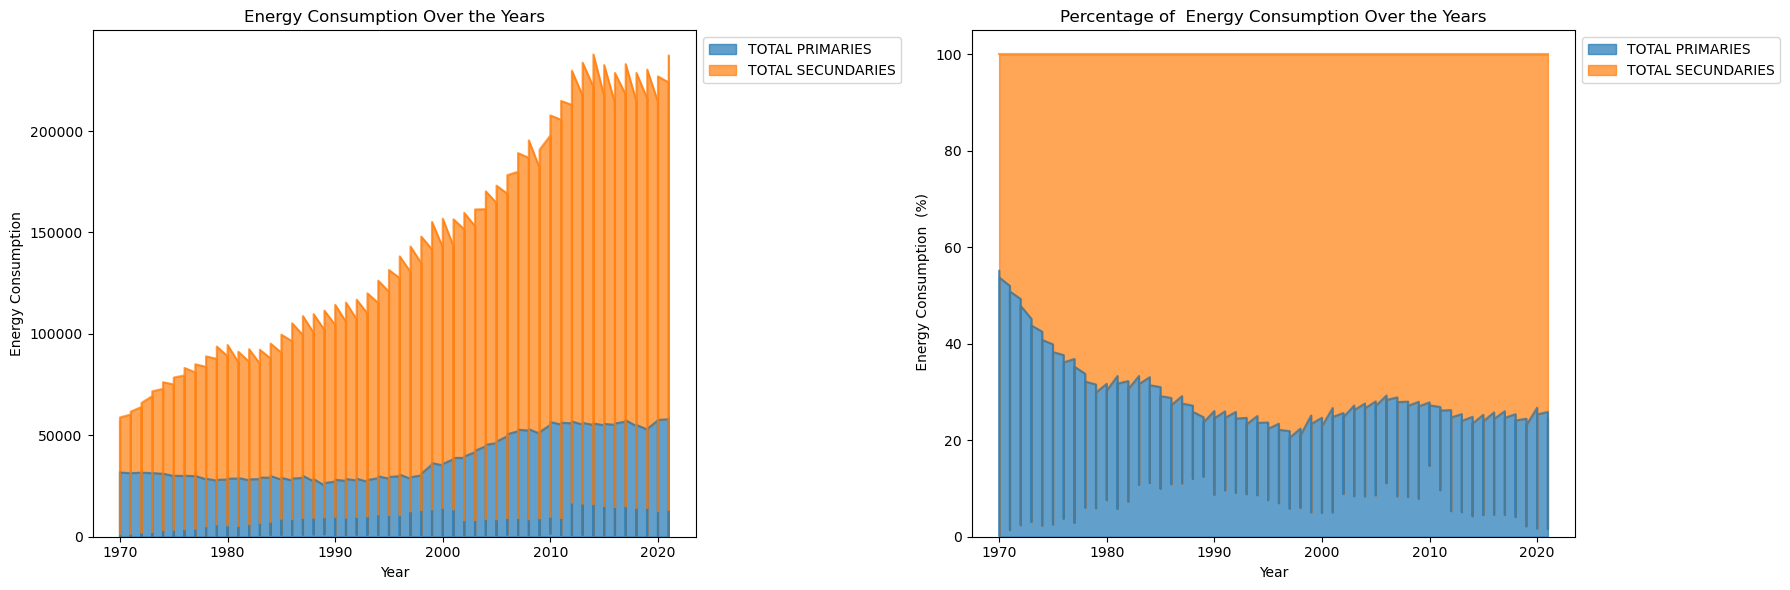

In [197]:
# Drop the 'TOTAL PRIMARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TC1.drop(columns=["TOTAL", "sum_col"])

# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_TC1_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel(' Energy Consumption  (%)')
ax2.set_title('Percentage of  Energy Consumption Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()